In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

In [ ]:
path="/content/drive/MyDrive/Paddy_Dataset"
if os.path.exists(path):
  print("Path exists")
  print(os.listdir(path))
else:
  print("Path does not exist")

path=path="/content/drive/MyDrive/Paddy_Dataset/Diseases"
if os.path.exists(path):
  print("Path exists")
  print(os.listdir(path))
path=path="/content/drive/MyDrive/Paddy_Dataset/Deficiencies"
if os.path.exists(path):
  print("Path exists")
  print(os.listdir(path))

Path exists
['Diseases', 'Deficiencies', 'Disease_Test_Images']
Path exists
['Downy_Mildew', 'Bacterial_Panicle_Blight', 'Brown_Spot', 'Dead_Heart', 'Bacterial_Leaf_Streak', 'Blast', 'Normal', 'Hispa', 'False_Smut', 'Tungro', 'Bacterial_Leaf_Blight']
Path exists
['Phosphorus_Deficiency', 'Nitrogen_Deficiency', 'Potassium_Deficiency']


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = "/content/drive/MyDrive/Paddy_Dataset/Diseases/"
img_size = (224, 224)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 8580 images belonging to 11 classes.
Found 2139 images belonging to 11 classes.


In [ ]:
print("Class Indices:", train_data.class_indices)


Class Indices: {'Bacterial_Leaf_Blight': 0, 'Bacterial_Leaf_Streak': 1, 'Bacterial_Panicle_Blight': 2, 'Blast': 3, 'Brown_Spot': 4, 'Dead_Heart': 5, 'Downy_Mildew': 6, 'False_Smut': 7, 'Hispa': 8, 'Normal': 9, 'Tungro': 10}


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3517s 13s/step - accuracy: 0.2331 - loss: 3.4738 - val_accuracy: 0.3801 - val_loss: 1.8488
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 637s 2s/step - accuracy: 0.4179 - loss: 1.7425 - val_accuracy: 0.4881 - val_loss: 1.5808
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.4989 - loss: 1.5276 - val_accuracy: 0.4708 - val_loss: 1.6012
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.5371 - loss: 1.4121 - val_accuracy: 0.5012 - val_loss: 1.5694
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 663s 2s/step - accuracy: 0.5822 - loss: 1.2931 - val_accuracy: 0.5531 - val_loss: 1.3995
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.6202 - loss: 1.1883 - val_accuracy: 0.5811 - val_loss: 1.3706
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.6430 - loss: 1.1362 - val_accuracy: 0.5587 - val_loss: 1.4127
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.6793 - loss: 1.0060 - val_ac

In [ ]:
model.save("/content/drive/MyDrive/Dis_Model.keras")


In [ ]:
import tensorflow as tf

# Load the trained model
model_path = "/content/drive/MyDrive/Dis_Model.keras"
model = tf.keras.models.load_model(model_path)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 7, 7, 960)           │       2,996,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 47040)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      24,084,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,268,259 (287.13 MB)

 Trainable params: 24,090,635 (91.90 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

 Optimizer params: 48,181,272 (183.80 MB)

In [ ]:
# Class Labels Mapping
class_names = ['Bacterial_Leaf_Blight', 'Bacterial_Leaf_Streak', 'Bacterial_Panicle_Blight',
               'Blast', 'Brown_Spot', 'Dead_Heart', 'Downy_Mildew', 'False_Smut',
               'Hispa', 'Normal', 'Tungro']


In [ ]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    """Load and preprocess an image."""
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to model input size
    image = np.array(image) / 255.0  # Normalize pixel values
    return np.expand_dims(image, axis=0)  # Add batch dimension


In [ ]:
# Test image path (change this to your test image)
test_image_path = "/content/drive/MyDrive/BLB_1.jpg"

# Preprocess and predict
image = preprocess_image(test_image_path)
predictions = model.predict(image)
predicted_class = np.argmax(predictions)
confidence = round(100 * np.max(predictions), 2)

# Output result
print(f"Predicted Disease: {class_names[predicted_class]}")
print(f"Confidence: {confidence}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Bacterial_Leaf_Blight
Confidence: 79.55000305175781%


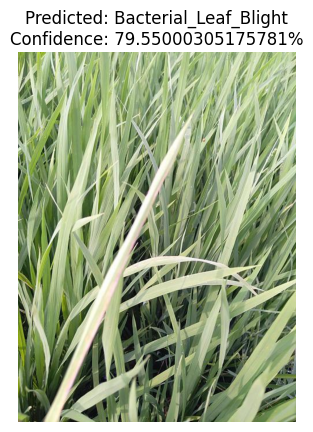

Precaution: Use resistant varieties. Avoid excessive nitrogen.


In [ ]:
import matplotlib.pyplot as plt

# Precaution Dictionary
precautions_dict = {
    "Bacterial_Leaf_Blight": "Use resistant varieties. Avoid excessive nitrogen.",
    "Bacterial_Leaf_Streak": "Improve drainage. Apply Copper fungicides.",
    "Bacterial_Panicle_Blight": "Use disease-free seeds. Ensure proper irrigation.",
    "Blast": "Use resistant varieties. Spray Tricyclazole.",
    "Brown_Spot": "Apply Potassium fertilizers. Use Mancozeb (Dithane M-45).",
    "Dead_Heart": "Use light traps for moths. Spray Chlorantraniliprole.",
    "Downy_Mildew": "Ensure good airflow. Avoid excessive moisture.",
    "False_Smut": "Apply Propiconazole (Tilt 25 EC) at booting stage.",
    "Hispa": "Handpick larvae. Apply Imidacloprid.",
    "Normal": "No precautions needed. Maintain proper crop management.",
    "Tungro": "Control leafhoppers. Remove infected plants."
}

# Display Image
plt.imshow(Image.open(test_image_path))
plt.axis("off")
plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence}%")
plt.show()

# Display Precaution
print(f"Precaution: {precautions_dict.get(class_names[predicted_class], 'No information available.')}")


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model_path = "/content/drive/MyDrive/Dis_Model.keras"
model = tf.keras.models.load_model(model_path)

# Class Labels Mapping
class_names = ['Bacterial_Leaf_Blight', 'Bacterial_Leaf_Streak', 'Bacterial_Panicle_Blight',
               'Blast', 'Brown_Spot', 'Dead_Heart', 'Downy_Mildew', 'False_Smut',
               'Hispa', 'Normal', 'Tungro']

# Precaution Dictionary
precautions_dict = {
    "Bacterial_Leaf_Blight": "Use resistant varieties. Avoid excessive nitrogen.",
    "Bacterial_Leaf_Streak": "Improve drainage. Apply Copper fungicides.",
    "Bacterial_Panicle_Blight": "Use disease-free seeds. Ensure proper irrigation.",
    "Blast": "Use resistant varieties. Spray Tricyclazole.",
    "Brown_Spot": "Apply Potassium fertilizers. Use Mancozeb (Dithane M-45).",
    "Dead_Heart": "Use light traps for moths. Spray Chlorantraniliprole.",
    "Downy_Mildew": "Ensure good airflow. Avoid excessive moisture.",
    "False_Smut": "Apply Propiconazole (Tilt 25 EC) at booting stage.",
    "Hispa": "Handpick larvae. Apply Imidacloprid.",
    "Normal": "No precautions needed. Maintain proper crop management.",
    "Tungro": "Control leafhoppers. Remove infected plants."
}

# Function to preprocess image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to model input size
    image = np.array(image) / 255.0  # Normalize pixel values
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Folder containing test images
test_folder = "/content/drive/MyDrive/Paddy_Dataset/Diseases/Normal"  # Change this to your folder path

# Get all image paths in the folder
image_paths = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith((".jpg", ".png", ".jpeg"))]

# Loop through each image and make predictions
for image_path in image_paths:
    image = preprocess_image(image_path)
    predictions = model.predict(image, verbose=0)
    predicted_class = np.argmax(predictions)
    confidence = round(100 * np.max(predictions), 2)

    # Display Image
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence}%")
    plt.show()

    # Print result and precautions
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Predicted Disease: {class_names[predicted_class]}")
    print(f"Confidence: {confidence}%")
    print(f"Precaution: {precautions_dict.get(class_names[predicted_class], 'No information available.')}")
    print("-" * 50)  # Separator for readability


Output hidden; open in https://colab.research.google.com to view.

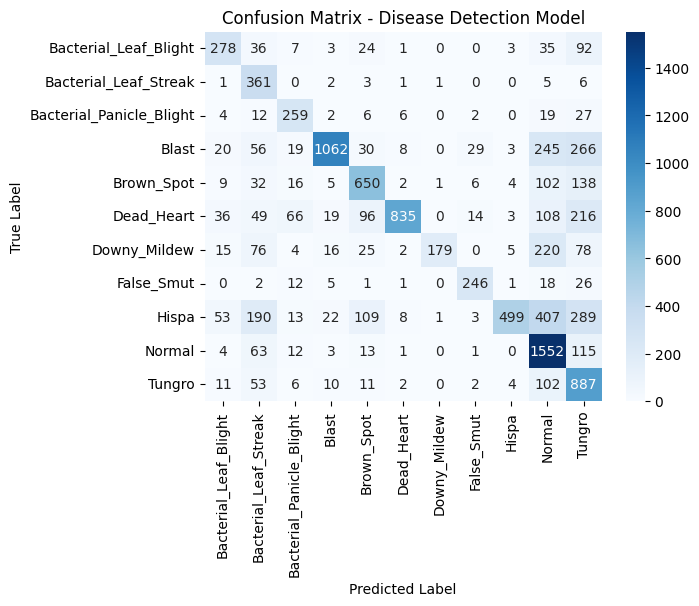

In [ ]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load trained model
model_path = "/content/drive/MyDrive/Dis_Model.keras"
model = tf.keras.models.load_model(model_path)

# Class Labels
class_names = ['Bacterial_Leaf_Blight', 'Bacterial_Leaf_Streak', 'Bacterial_Panicle_Blight',
               'Blast', 'Brown_Spot', 'Dead_Heart', 'Downy_Mildew', 'False_Smut',
               'Hispa', 'Normal', 'Tungro']

test_dir = "/content/drive/MyDrive/Paddy_Dataset/Diseases"

def preprocess_image(image_path):
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image) / 255.0
    return np.expand_dims(image, axis=0)

true_labels, pred_labels = [], []

for class_index, disease in enumerate(class_names):
    disease_folder = os.path.join(test_dir, disease)
    if not os.path.exists(disease_folder):
        continue
    for image_name in os.listdir(disease_folder):
        if image_name.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(disease_folder, image_name)
            image = preprocess_image(image_path)
            predicted_class = np.argmax(model.predict(image, verbose=0))
            true_labels.append(class_index)
            pred_labels.append(predicted_class)

# Generate and display Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Disease Detection Model")
plt.show()